# Mathematical Optimization: Linear and Integer Linear Programming

## Linear programming: standard form

Linear programming is a mathematical optimization technique that is useful for modeling and solving problems related to allocation of limited resources. A linear program is a system of linear equations and inequalities. Any linear program (LP) can be written in the following canonical form:

$$
\begin{align*}
\textnormal{Find the vector } & \mathbf{x} \\
\textnormal{that minimizes } & \mathbf{c}^\mathsf{T}\mathbf{x} \\
\textnormal{subject to the constraints } & \mathbf{A} \mathbf{x} \leq \mathbf{b} \\
\textnormal{and } & \mathbf{x} \geq \mathbf{0}.
\end{align*}
$$

(Note that usually this definition calls for maximization, not minimization, but Scipy's linear programming functions perform minimization.)

## Linear programming example

Prof. Muffinman and Dr. Lemonade need to purchase snacks for day 3 of their summer school. There are 30 students. Each student will write 20 lines of code per cup of tea they drink, 100 per cup of coffee, 100 per muffin, 20 per donut (because the donuts give them tummy aches), and 70 per bagel. Here are the unit prices for the treats:

| Item   | Cost  |
| ------ | ----- |
| Tea    | $1.00 |
| Coffee | $2.00 |
| Muffin | $2.00 |
| Donut  | $3.50 |
| Bagel  | $2.00 |

Each student must have at least one drink and at least one pastry, at least one of which must be a donut. The Muffinman-Lemonade lab has a budget of $180 for snacks. How many of each snack should they buy? How many lines of code do the students write?

**Exercise 1.** Write down a linear cost function and a system of inequalities to model this problem.

<details>
<summary>Expand for Exercise 1 Solution</summary>
With

$$
\begin{align*}
x_0 &:= \textnormal{cups of tea} \\
x_1 &:= \textnormal{cups of coffee} \\
x_2 &:= \textnormal{muffins} \\
x_3 &:= \textnormal{donuts} \\
x_4 &:= \textnormal{bagels} \\
\end{align*}
$$

maximize

$$
20 x_0 + 100 x_1 + 100 x_2 + 20 x_3 + 70 x_4
$$

subject to the constraints

$$
\begin{align*}
x_0 + x_1 &\geq 30 \\
x_2 + x_3 + x_4 &\geq 30 \\
x_3 &\geq 30 \\
x_0 + 2 x_1 + 2 x_2 + 3.5 x_3 + 2 x_4 &\leq 180
\end{align*}
$$.

</details>

**Excercise 2.** Express this problem as LP in canonical form by writing down the values of the array $\mathbf{A}$, the vector $\mathbf{b}$, and the vector $\mathbf{c}$.

<details>
<summary>Expand for Exercise 2 Solution</summary>

$$
\mathbf{A} = \left(\begin{array}{ccccc}
-1 & -1 & 0 & 0 & 0 \\
0 & 0 & -1 & -1 & -1 \\
0 & 0 & 0 & -1 & 0 \\
1 & 2 & 2 & 3.5 & 2
\end{array}\right),\quad
\mathbf{b} = \left(\begin{array}{c}
-30 \\ -30 \\ -30 \\ 180
\end{array}\right),\quad
\mathbf{c} = \left(\begin{array}{c}
-20 \\ -100 \\ -100 \\ -20 \\ -70
\end{array}\right)
$$
</details>

**Exercise 3.** Solve the LP problem using [`scipy.optimize.linprog`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) by completing the code below. How many of each treat should Muffinman and Lemonade order?

In [1]:
import numpy as np
from scipy import optimize

# Fill in these values
# c = ...
# A = ...
# b = ...
c = np.asarray([-20, -100, -100, -20, -70])
A = np.asarray([[-1, -1, 0, 0, 0],
                [0, 0, -1, -1, -1],
                [0, 0, 0, -1, 0],
                [1, 2, 2, 3.5, 2]])
b = np.asarray([-30, -30, -30, 180])

solution = optimize.linprog(c, A, b)

print(f'{-solution.fun:5g} lines of code')
varnames = ['teas', 'coffees', 'muffins', 'donuts', 'bagels']
for count, name in zip(solution.x, varnames):
    print(f'{count:5g} {name}')

 4350 lines of code
    0 teas
 37.5 coffees
    0 muffins
   30 donuts
    0 bagels


## Integer linear programming (ILP), mixed integer linear programming (MILP)

Integer linear programming (ILP) is an extension of LP in which all of the decision variables $\mathbf{x}$ are integers. In mixed integer linear programming (MILP), certain of the decision variables are reals and certain are integers.

**Exercise 4.** The caterer only sells _whole_ cups of coffee and tea and _whole_ pastries. Solve the LP problem using [`scipy.optimize.milp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.milp.html) by completing the code below. How many of each treat should Muffinman and Lemonade order?

In [2]:
solution = optimize.milp(
    c,
    integrality=np.ones_like(1),  # all variables must be integers
    constraints=optimize.LinearConstraint(A, ub=b)
)

print(f'{-solution.fun:5g} lines of code')
varnames = ['teas', 'coffees', 'muffins', 'donuts', 'bagels']
for count, name in zip(solution.x, varnames):
    print(f'{count:5g} {name}')

 4320 lines of code
    1 teas
   30 coffees
    7 muffins
   30 donuts
    0 bagels


**Exercise 5.** There is a sale on bagels: they are half price when you buy them by the dozen. How do you incorporate this into your model?

<details>
<summary>Expand for Exercise 5 Solution</summary>
With

$$
\begin{align*}
x_0 &:= \textnormal{cups of tea} \\
x_1 &:= \textnormal{cups of coffee} \\
x_2 &:= \textnormal{muffins} \\
x_3 &:= \textnormal{donuts} \\
x_4 &:= \textnormal{total bagels} \\
x_5 &:= \textnormal{number of 1-dozen bags of bagels} \\
x_6 &:= \textnormal{number of individual bagels}
\end{align*}
$$

maximize

$$
20 x_0 + 100 x_1 + 100 x_2 + 20 x_3 + 70 x_4
$$

subject to the constraints

$$
\begin{align*}
x_0 + x_1 &\geq 30 \\
x_2 + x_3 + x_4 &\geq 30 \\
x_3 &\geq 30 \\
x_0 + 2 x_1 + 2 x_2 + 3.5 x_3 + 6 x_5 + 2 x_6 &\leq 180 \\
x_1 - 12 x_5 - x_6 &\leq 0
\end{align*}
$$.

The standard form of the problem is

$$
\mathbf{A} = \left(\begin{array}{ccccc}
-1 & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & -1 & -1 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 & 0 \\
1 & 2 & 2 & 3.5 & 0 & 6 & 2 \\
0 & 0 & 0 & 0 & 1 & -12 & -1 \\
\end{array}\right),\quad
\mathbf{b} = \left(\begin{array}{c}
-30 \\ -30 \\ -30 \\ 180 \\ 0
\end{array}\right),\quad
\mathbf{c} = \left(\begin{array}{c}
-20 \\ -100 \\ -100 \\ -20 \\ -70 \\ 0 \\ 0
\end{array}\right).
$$

</details>

In [3]:
import numpy as np
from scipy import optimize

# Fill in these values
# c = ...
# A = ...
# b = ...
c = np.asarray([-20, -100, -100, -20, -70, 0, 0])
A = np.asarray([[-1, -1, 0, 0, 0, 0, 0],
                [0, 0, -1, -1, -1, 0, 0],
                [0, 0, 0, -1, 0, 0, 0],
                [1, 2, 2, 3.5, 0, 12, 2],
                [0, 0, 0, 0, 1, -12, -1]])
b = [-30, -30, -30, 180, 0]

solution = optimize.milp(
    c,
    integrality=np.ones_like(c),
    constraints=optimize.LinearConstraint(A, ub=b)
)

print(f'{-solution.fun:5g} lines of code')
varnames = ['teas', 'coffees', 'muffins', 'donuts', 'bagels']
for count, name in zip(solution.x, varnames):
    print(f'{count:5g} {name}')

 4560 lines of code
    1 teas
   31 coffees
    0 muffins
   30 donuts
   12 bagels


**Exercise 6.** Model and solve the problem using the [high-level Python interface to the HiGHS solver](https://ergo-code.github.io/HiGHS/dev/interfaces/python/).

This is the same solver that SciPy uses, but it provides a higher-level interface that allows you to input the model symbollically.

In [4]:
import highspy

model = highspy.Highs()

# Create decision variables
teas = model.addIntegral()
coffees = model.addIntegral()
# fill me in...
muffins = model.addIntegral()
donuts = model.addIntegral()
bagels = model.addIntegral()
bagel_dozens = model.addIntegral()
bagel_singles = model.addIntegral()

# Add constraints
model.addConstr(teas + coffees >= 30)
# fill me in...
model.addConstr(muffins + donuts + bagels >= 30)
model.addConstr(donuts >= 30)
model.addConstr(teas + 2 * coffees + 2 * muffins + 3.5 * donuts + 12 * bagel_dozens + 2 * bagel_singles <= 180)
model.addConstr(bagels <= 12 * bagel_dozens + bagel_singles)

# Fill me in
# model.maximize(20 * teas + ...)
model.maximize(20 * teas + 100 * coffees + 100 * muffins + 20 * donuts + 70 * bagels)

print(f'{model.getObjectiveValue():5g} lines of code')
varnames = ['teas', 'coffees', 'muffins', 'donuts', 'bagels']
for count, name in zip(model.allVariableValues(), varnames):
    print(f'{count:5g} {name}')

 4560 lines of codeRunning HiGHS 1.7.2 (git hash: 184e327): Copyright (c) 2024 HiGHS under MIT licence terms

    1 teas
   31 coffees
    0 muffins
   30 donuts
   12 bagels
Coefficient ranges:
  Matrix [1e+00, 1e+01]
  Cost   [2e+01, 1e+02]
  Bound  [0e+00, 0e+00]
  RHS    [3e+01, 2e+02]
Presolving model
4 rows, 7 cols, 14 nonzeros  0s
3 rows, 6 cols, 10 nonzeros  0s
Objective function is integral with scale 0.1

Solving MIP model with:
   3 rows
   6 cols (0 binary, 6 integer, 0 implied int., 0 continuous)
   10 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   17130           -inf                 inf        0      0      0         0     0.0s
 R       0       0         0   0.00%   4650            4440               4.73%        0      0      0

## MILP for astronomical observation planning

Let's use MILP to plan follow-up of a LIGO-Virgo event. We'll use [S230529ay](https://gracedb.ligo.org/superevents/S230529ay/), a NSBH merger candidate that ZTF actually followed up ([GCN Circular 33900](https://gcn.nasa.gov/circulars/33900)). We'll download all of the data for you below, so all you have to do is the math! 😉

### Problem setup

We'll use the following Python packages to help us set up the problem:

- [ligo.skymap](https://pypi.org/project/ligo.skymap/) for reading and plotting LIGO-Virgo HEALPix localization maps
- [astropy-healpix](https://pypi.org/project/astropy-healpix/) for converting HEALPix coordinates to RA and Dec
- [healpy](https://pypi.org/project/healpy/) for finding the HEALPix pixels contained within polygon regions
- [astroplan](https://pypi.org/project/astroplan/) for finding when a given ZTF field is observable

(Note from this point on that these examples work on Linux and macOS but _not_ Windows.)

First, some imports...

In [5]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import astroplan
from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u
from astropy.utils.data import download_file
from astropy.table import QTable
from astropy.time import Time
from astropy_healpix import HEALPix
from ligo.skymap import plot
from ligo.skymap.io import read_sky_map
import healpy as hp
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm

warnings.simplefilter('ignore', astroplan.TargetNeverUpWarning)
warnings.simplefilter('ignore', astroplan.TargetAlwaysUpWarning)

### Read localization map

First, we'll download and plot the sky map.

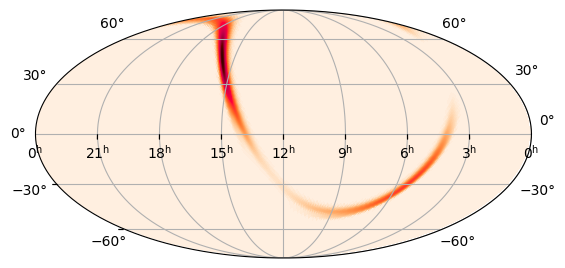

In [6]:
skymap, metadata = read_sky_map('https://gracedb.ligo.org/api/superevents/S231113bw/files/bayestar.multiorder.fits')

ax = plt.axes(projection='astro mollweide')
ax.imshow_hpx(skymap, cmap='cylon')
ax.grid()

We can also get the event time from the sky map.

In [7]:
event_time = Time(metadata['gps_time'], format='gps').utc
event_time.format = 'iso'
event_time

<Time object: scale='utc' format='iso' value=2023-11-13 20:04:17.909>

### Model ZTF focal plane footprint

Let's create a model of the footprint of the ZTF focal plane, with the telescope pointed at a reference position of R.A.=0°, Dec.=0°.

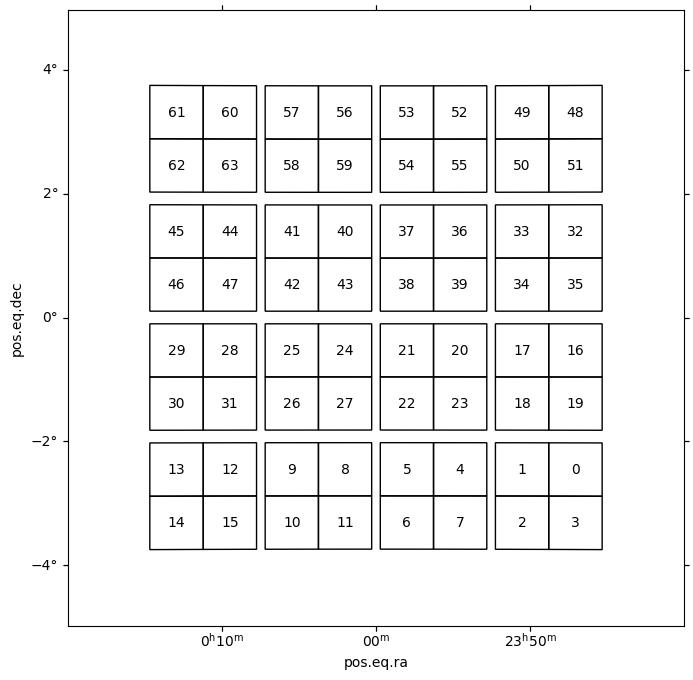

In [8]:
# Table 1 from Bellm et al. (2019)
# http://adsabs.harvard.edu/abs/2019PASP..131a8002B
ns_nchips = 4
ew_nchips = 4
ns_npix = 6144
ew_npix = 6160
plate_scale = 1.01 * u.arcsec
ns_chip_gap = 0.205 * u.deg
ew_chip_gap = 0.140 * u.deg

ns_total = ns_nchips * ns_npix * plate_scale + (ns_nchips - 1) * ns_chip_gap
ew_total = ew_nchips * ew_npix * plate_scale + (ew_nchips - 1) * ew_chip_gap

rcid = np.arange(64)

chipid, rc_in_chip_id = np.divmod(rcid, 4)
ns_chip_index, ew_chip_index = np.divmod(chipid, ew_nchips)
ns_rc_in_chip_index = np.where(rc_in_chip_id <= 1, 1, 0)
ew_rc_in_chip_index = np.where((rc_in_chip_id == 0) | (rc_in_chip_id == 3), 0, 1)

ew_offsets = ew_chip_gap * (ew_chip_index - (ew_nchips - 1) / 2) + ew_npix * plate_scale * (ew_chip_index - ew_nchips / 2) + 0.5 * ew_rc_in_chip_index * plate_scale * ew_npix
ns_offsets = ns_chip_gap * (ns_chip_index - (ns_nchips - 1) / 2) + ns_npix * plate_scale * (ns_chip_index - ns_nchips / 2) + 0.5 * ns_rc_in_chip_index * plate_scale * ns_npix

ew_ccd_corners = 0.5 * plate_scale * np.asarray([ew_npix, 0, 0, ew_npix])
ns_ccd_corners = 0.5 * plate_scale * np.asarray([ns_npix, ns_npix, 0, 0])

ew_vertices = ew_offsets[:, np.newaxis] + ew_ccd_corners[np.newaxis, :]
ns_vertices = ns_offsets[:, np.newaxis] + ns_ccd_corners[np.newaxis, :]


def get_footprint(center):
    """Return the footprint of the ZTF camera centered at the given position.

    Parameters
    ----------
    center : astropy.coordinates.SkyCoord
        The center of the field or fields: either a single (scalar) sky coord
        or an array of sky coordinates of any size.

    Returns
    -------
    coords : astropy.coordinates.SkyCoord
        An array of coordinates. If the center is a single sky coordinate, then
        the returned array has shape (64, 4), representing the vertices of 64
        quadrilaterals. If the center is an array of shape (n, m, ...), then
        the returned array has shape (n, m, ..., 64, 4).
    """
    return SkyCoord(
        ew_vertices, ns_vertices,
        frame=center[..., np.newaxis, np.newaxis].skyoffset_frame()
    ).icrs


center = SkyCoord(0 * u.deg, 0 * u.deg)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='astro zoom', center='0d 0d', radius=5 * u.deg)
for i, verts in enumerate(get_footprint(center)):
    rc_center = SkyCoord(*verts.cartesian.xyz.sum(1), representation_type='cartesian')
    rc_center.representation_type = 'unitspherical'
    ax.add_patch(plt.Polygon(np.column_stack((verts.ra.deg, verts.dec.deg)), edgecolor='k', facecolor='none', transform=ax.get_transform('world')))
    ax.text(rc_center.ra.deg, rc_center.dec.deg, str(i), transform=ax.get_transform('world'), ha='center', va='center')

### Fetch ZTF field grid

Let's download the ZTF field grid from GitHub.

(Note that the ZTF field IDs start from 1, and that there are some ranges that are skipped, so the index of a row in this array does not exactly match the field ID. This won't matter for this exercise, but just be aware of it if you are reusing the code in this notebook!)

In [9]:
url = 'https://github.com/ZwickyTransientFacility/ztf_information/raw/master/field_grid/ZTF_Fields.txt'
filename = download_file(url)
field_grid = QTable(np.recfromtxt(filename, comments='%', usecols=range(3), names=['field_id', 'ra', 'dec']))
field_grid['coord'] = SkyCoord(field_grid.columns.pop('ra') * u.deg, field_grid.columns.pop('dec') * u.deg)
field_grid

field_id,coord
,"deg,deg"
int64,SkyCoord
1,"0.0,-89.05"
2,"90.0,-89.05"
3,"180.0,-89.05"
4,"270.0,-89.05"
5,"16.36364,-81.85"
6,"49.09091,-81.85"
7,"81.81818,-81.85"
8,"114.54545,-81.85"


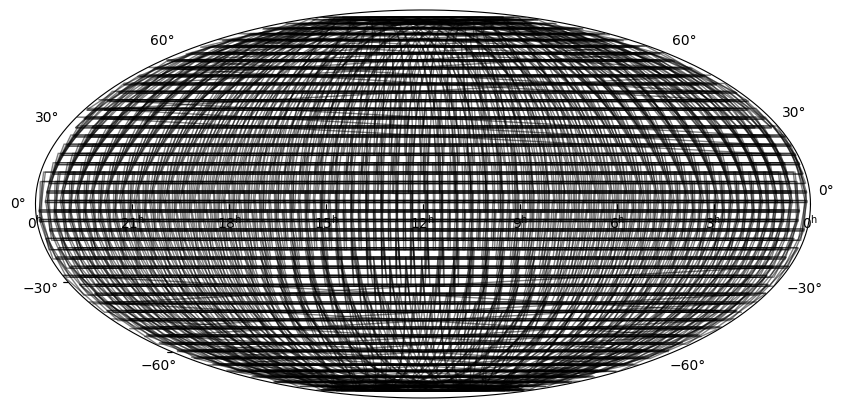

In [10]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='astro mollweide')
for row in field_grid:
    coords = SkyCoord(
        [ew_total, -ew_total, -ew_total, ew_total],
        [ns_total, ns_total, -ns_total, -ns_total],
        frame=row['coord'].skyoffset_frame()
    ).icrs
    ax.add_patch(plt.Polygon(
        np.column_stack((coords.ra.deg, coords.dec.deg)),
        alpha=0.5,
        facecolor='none',
        edgecolor='black',
        transform=ax.get_transform('world')
    ))

### Select fields that are observable

We'll filter for fields that are observable at any point during the night.

In [11]:
# Observer site
observer = astroplan.Observer.at_site('Palomar')

# Find the earliest possible start time of observations.
# If it's night time (defined here as the sun being at least 18°
# below the horizon for astronomical twilight), then the start
# time is the time of the event. Otherwise, it's the time of sunset.
night_horizon = -18 * u.deg
if observer.is_night(event_time, horizon=night_horizon):
    start_time = event_time
else:
    start_time = observer.sun_set_time(
        event_time, horizon=night_horizon, which='next')

# Find the latest possible end time of observations: the time of sunrise.
end_time = observer.sun_rise_time(
    start_time, horizon=night_horizon, which='next')


min_airmass = 2.5 * u.dimensionless_unscaled
airmass_horizon = (90 * u.deg - np.arccos(1 / min_airmass))
targets = field_grid['coord']

# Find the time that each field rises and sets above an airmass of 2.5.
target_start_time = Time(np.where(
    observer.target_is_up(start_time, targets, horizon=airmass_horizon),
    start_time,
    observer.target_rise_time(start_time, targets, which='next', horizon=airmass_horizon)))
target_start_time.format = 'iso'

# Find the time that each field sets below the airmass limit. If the target
# is always up (i.e., it's circumpolar) or if it sets after surnsise,
# then set the end time to sunrise.
target_end_time = observer.target_set_time(
    target_start_time, targets, which='next', horizon=airmass_horizon)
target_end_time[
    (target_end_time.mask & ~target_start_time.mask) | (target_end_time > end_time)
] = end_time
target_end_time.format = 'iso'

# Select fields that are observable for long enough for at least one exposure
# sequence of 1800 seconds.
exposure_time = 1800 * u.second
field_grid['start_time'] = target_start_time
field_grid['end_time'] = target_end_time
observable_fields = field_grid[target_end_time - target_start_time >= exposure_time]
observable_fields

/Users/lpsinger/Library/Python/3.11/lib/python/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


field_id,coord,start_time,end_time
,"deg,deg",,
int64,SkyCoord,Time,Time
199,"0.62682,-31.45",2023-11-14 03:15:20.607,2023-11-14 05:22:57.651
200,"8.37561,-31.45",2023-11-14 03:46:11.031,2023-11-14 05:53:48.856
201,"16.12439,-31.45",2023-11-14 04:17:01.042,2023-11-14 06:24:37.632
202,"23.87318,-31.45",2023-11-14 04:48:03.427,2023-11-14 06:55:24.631
203,"31.62196,-31.45",2023-11-14 05:19:08.224,2023-11-14 07:26:09.640
204,"39.37075,-31.45",2023-11-14 05:50:11.535,2023-11-14 07:56:52.683
205,"47.11954,-31.45",2023-11-14 06:21:13.362,2023-11-14 08:27:33.969
206,"54.86832,-31.45",2023-11-14 06:52:15.139,2023-11-14 08:58:13.820


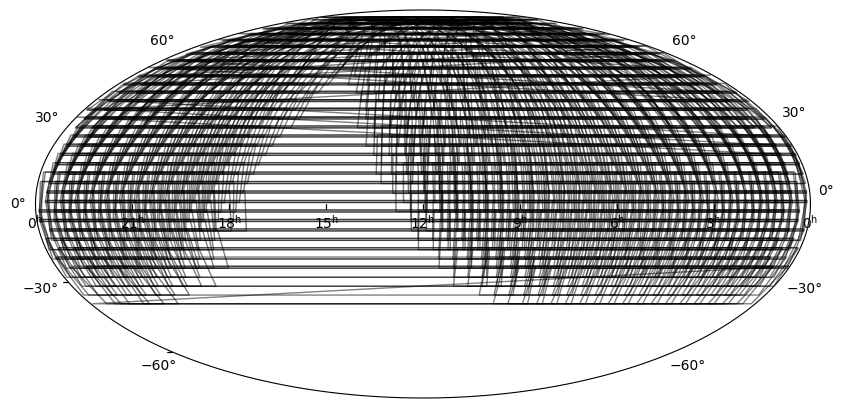

In [12]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='astro mollweide')
for row in observable_fields:
    coords = SkyCoord(
        [ew_total, -ew_total, -ew_total, ew_total],
        [ns_total, ns_total, -ns_total, -ns_total],
        frame=row['coord'].skyoffset_frame()
    ).icrs
    ax.add_patch(plt.Polygon(
        np.column_stack((coords.ra.deg, coords.dec.deg)),
        alpha=0.5,
        facecolor='none',
        edgecolor='black',
        transform=ax.get_transform('world')
    ))

### HEALPix representation of ZTF focal plane footprint

Now we will model the ZTF focal plane by computing the HEALPix pixel indices contained within the region.

Play the value of `nside` to adjust the HEALPix resolution. It must be an integer power of 2.

**Exercise 7.** What is the minimum HEALPix resolution to resolve all of the chip gaps?

<details>
<summary>Expand for Exercise 7 Solution</summary>

`nside=256`
</details>

Note that values much larger than `nside=128` will result in problems that take a very long time to solve with HiGHS, and for which you might need to use a professional solver like [CPLEX](https://www.ibm.com/products/ilog-cplex-optimization-studio/cplex-optimizer), [Gurobi](https://www.gurobi.com), or [FICO Xpress](https://www.fico.com/en/products/fico-xpress-optimization).

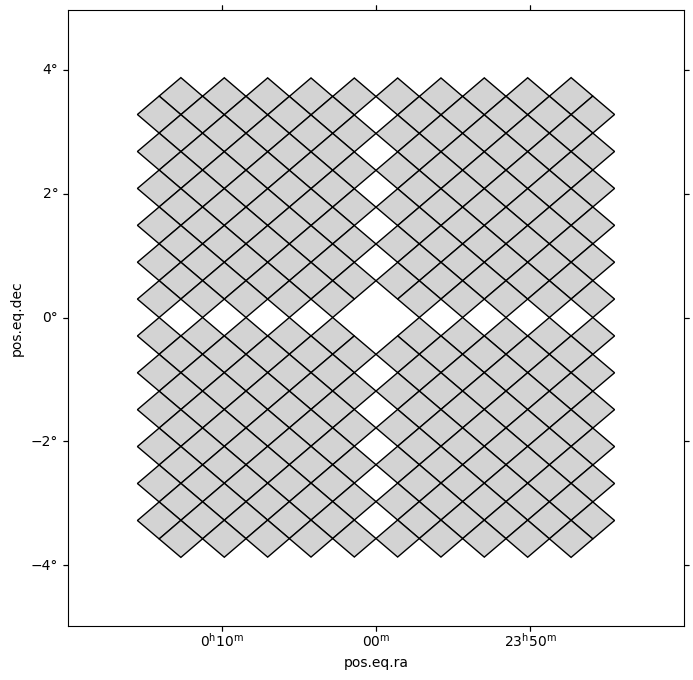

In [13]:
# fill me in: play with the value of nside!
hpx = HEALPix(nside=128, frame=ICRS())

footprint = np.moveaxis(
    get_footprint(SkyCoord(0 * u.deg, 0 * u.deg)).cartesian.xyz.value, 0, -1)
footprint_healpix = np.unique(np.concatenate(
    [hp.query_polygon(hpx.nside, v, nest=(hpx.order == 'nested')) for v in footprint]))

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='astro zoom', center='0d 0d', radius=5 * u.deg)
for boundary in hpx.boundaries_skycoord(footprint_healpix, 1):
    ax.add_patch(plt.Polygon(np.column_stack((boundary.ra.deg, boundary.dec.deg)), edgecolor='k', facecolor='lightgray', transform=ax.get_transform('world')))


Now that we have selected a nice resolution, compute the footprints of every ZTF field as HEALPix indices. Also downsample the sky map to the same resolution.

In [14]:
footprints = np.moveaxis(get_footprint(observable_fields['coord']).cartesian.xyz.value, 0, -1)
footprints_healpix = [
    np.unique(np.concatenate([hp.query_polygon(hpx.nside, v) for v in footprint]))
    for footprint in tqdm(footprints)]

prob = hp.ud_grade(skymap, hpx.nside, power=-2)

  0%|          | 0/1053 [00:00<?, ?it/s]

Now it's your turn to do the math!

### Optimal tiling using max weighted coverage

**Exercise 8.** Which 30 fields should ZTF observe in order to follow up this GW event? How much probability is contained in those fields?

Hint: Construct a max weighted coverage model of this problem. Express it as a MILP. Write the MILP model in HiGHS and solve it.

In [15]:
model = highspy.Highs()

field_vars = [model.addBinary() for _ in range(len(footprints))]
pixel_vars = [model.addBinary() for _ in range(hpx.npix)]

# fill me in...
footprints_healpix_inverse = [[] for _ in range(hpx.npix)]
for field, pixels in enumerate(footprints_healpix):
    for pixel in pixels:
        footprints_healpix_inverse[pixel].append(field)

for i_pixel, i_fields in enumerate(footprints_healpix_inverse):
    model.addConstr(sum(field_vars[i] for i in i_fields) >= pixel_vars[i_pixel])
model.addConstr(sum(field_vars) <= 30)
model.maximize(prob.dot(pixel_vars))

Running HiGHS 1.7.2 (git hash: 184e327): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [2e-15, 5e-04]
  Bound  [1e+00, 1e+00]
  RHS    [3e+01, 3e+01]


<HighsStatus.kOk: 0>

Presolving model
121363 rows, 10683 cols, 251098 nonzeros  0s
9631 rows, 9776 cols, 29593 nonzeros  0s

Solving MIP model with:
   9631 rows
   9776 cols (9776 binary, 0 integer, 0 implied int., 0 continuous)
   29593 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   0.4191554461    -inf                 inf        0      0      0         0     0.2s
 R       0       0         0   0.00%   0.3911729088    0.3626682799       7.86%        0      0      0      4426     0.3s
 C       0       0         0   0.00%   0.3909970048    0.3626693854       7.81%      333      8      0      4446     0.5s
 L       0       0         0   0.00%   0.3905508723    0.3905508723       0.00%     2345     52      0      4638     1.8s

Solving report
  Status            Opt

How much probability is contained in the fields that we selected?

In [16]:
model.getObjectiveValue()

0.3905508722593743

Which fields did you pick to observe?

In [17]:
selected_fields = observable_fields[np.asarray(model.variableValues(field_vars), dtype=bool)]
selected_fields

field_id,coord,start_time,end_time
,"deg,deg",,
int64,SkyCoord,Time,Time
209,"78.11468,-31.45",2023-11-14 08:25:55.817,2023-11-14 10:29:57.662
210,"85.86346,-31.45",2023-11-14 08:57:03.121,2023-11-14 11:00:30.964
255,"75.09111,-24.25",2023-11-14 06:57:09.757,2023-11-14 11:34:44.448
304,"72.44639,-17.05",2023-11-14 06:04:21.914,2023-11-14 12:06:32.856
353,"61.5943,-9.85",2023-11-14 04:50:11.038,2023-11-14 11:54:20.189
354,"68.64348,-9.85",2023-11-14 05:18:21.064,2023-11-14 12:22:23.697
795,"246.70105,54.95",2023-11-14 02:11:48.167,2023-11-14 03:06:43.011
824,"246.66667,62.15",2023-11-14 02:11:48.167,2023-11-14 03:33:14.814


Plot the fields that you selected to observe.

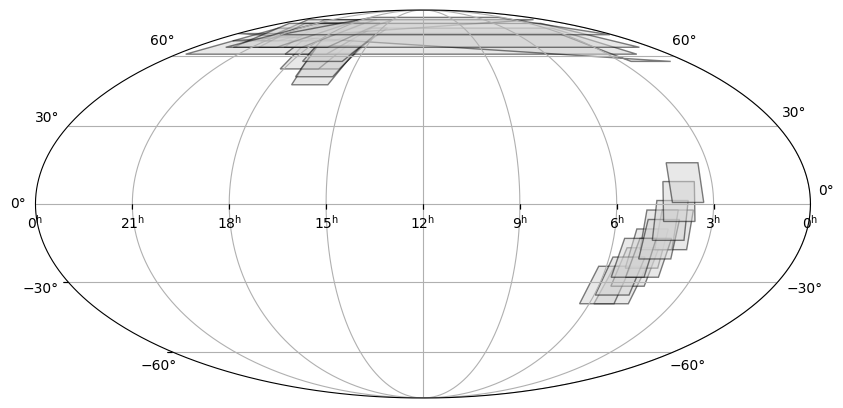

In [18]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='astro mollweide')
for row in selected_fields:
    coords = SkyCoord(
        [ew_total, -ew_total, -ew_total, ew_total],
        [ns_total, ns_total, -ns_total, -ns_total],
        frame=row['coord'].skyoffset_frame()
    ).icrs
    ax.add_patch(plt.Polygon(
        np.column_stack((coords.ra.deg, coords.dec.deg)),
        alpha=0.5,
        facecolor='lightgray',
        edgecolor='black',
        transform=ax.get_transform('world')
    ))
ax.grid()

### Optimal scheduling

Now that we have identified which fields to observe, it's time to schedule them: we must decide which fields to observe in what order. For this problem we are going to make use of our **Logical constraints ↔︎ ILP translation dictionary** from the lecture.

We start our model by creating two vectors of decision variables:
- The binary vector $\mathbf{x} = (x_1, x_2, \dots, x_n)$, where $x_i$ is 1 if we decide to observe field $i$, otherwise 0.
- The real vector $\mathbf{t} = (t_1, t_2, \dots, t_n)$, where $t_i$ is the start time of the observation of field $i$. Each of these variables will have a lower bound that is the earliest time that the field can be observed, and an upper bound that is the latest time that it can be observed.

We want to maximize the total number of fields that we can observe, $\sum_i x_i$.

We need to add some constraints to ensure that the observations do not overlap: we can observe at most one field at a time. If the duration of each exposure is $\delta$, then in "pseudocode" these constraints are:

$$
\textnormal{if } x_i = 1, \textnormal{ then } t_i + \delta \leq t_j \textnormal{ or } t_j + \delta \leq t_i \textnormal{ for all } j < i.
$$

**Exercise 9**. Using the **Logical constraints ↔︎ ILP translation dictionary**, express the no-overlap constraints above as a system of linear inequalities suitable for a MILP.

Hint: you'll probably use the big-M trick!

<details>
<summary>Expand for Exercise 9 solution</summary>
Introduce the auxiliary binary variables $s_{ij}$ which are 1 if we observe field $i$ before $j$, or 0 if we observe field $j$ before field $i$. The constraints are

$$
\begin{align*}
t_i + \delta x_i - t_j \leq M (1 - s_{ij})
t_j + \delta x_j - t_i \leq M s_{ij}
\end{align*}
$$

for sufficiently large $M$ (for example, $M$ larger than the duration of the night).
</summary>

**Exercise 10**. Complete the code below to model the schedule as an MILP and find the order in which to obseve the ZTF fields.

In [19]:
model = highspy.Highs()

# Limit run time; this can take while to solve!
# The solver will try to find the best feasible solution within the time limit.
model.setOptionValue('time_limit', 60)

delta = exposure_time.to_value(u.day)
# Fill me in
M = (selected_fields['end_time'].max() - selected_fields['start_time'].min()).to_value(u.day).item()

t = [model.addVariable(
        lb=(row['start_time'] - start_time).to_value(u.day),
        ub=(row['end_time'] - start_time - exposure_time).to_value(u.day),
     ) for row in selected_fields]
x = [model.addBinary() for _ in range(len(t))]
s = [[model.addBinary() for j in range(i)] for i in range(len(t))]

# Fill me in, add constraints...
for i in range(len(t)):
    for j in range(i):
        model.addConstr(t[i] + delta * x[i] - t[j] <= M * (1 - s[i][j]))
        model.addConstr(t[j] + delta * x[j] - t[i] <= M * s[i][j])

model.maximize(sum(x))

Running HiGHS 1.7.2 (git hash: 184e327): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-02, 1e+00]
  Cost   [1e+00, 1e+00]
  Bound  [2e-02, 1e+00]
  RHS    [4e-01, 4e-01]
Presolving model
779 rows, 395 cols, 3007 nonzeros  0s
679 rows, 395 cols, 2707 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   679 rows
   395 cols (365 binary, 0 integer, 0 implied int., 30 continuous)
   2707 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   30              -inf                 inf        0      0      0         0     0.0s
         0       0         0   0.00%   30              -inf                 inf        0      0      2       154     0.0s
 R       0       0         0   0.00%   30     

<HighsStatus.kWarning: 1>

Which fields did you choose to observe?

In [20]:
scheduled_fields = QTable(selected_fields)
scheduled_fields['scheduled_start_time'] = Time(model.variableValues(t) + start_time, format='mjd')
scheduled_fields['scheduled_start_time'].format = 'iso'
scheduled_fields['scheduled_end_time'] = scheduled_fields['scheduled_start_time'] + exposure_time
scheduled_fields = scheduled_fields[np.asarray(model.variableValues(x), dtype=bool)]
scheduled_fields.sort('scheduled_start_time')
scheduled_fields

field_id,coord,start_time,end_time,scheduled_start_time,scheduled_end_time
,"deg,deg",,,,
int64,SkyCoord,Time,Time,Time,Time
795,"246.70105,54.95",2023-11-14 02:11:48.167,2023-11-14 03:06:43.011,2023-11-14 02:11:48.167,2023-11-14 02:41:48.167
1829,"246.98986,58.55",2023-11-14 02:11:48.167,2023-11-14 03:20:10.709,2023-11-14 02:41:48.167,2023-11-14 03:11:48.167
1855,"248.90752,65.75",2023-11-14 02:11:48.167,2023-11-14 03:59:36.637,2023-11-14 03:11:48.167,2023-11-14 03:41:48.167
847,"248.57143,69.35",2023-11-14 02:11:48.167,2023-11-14 04:20:42.300,2023-11-14 03:41:48.167,2023-11-14 04:11:48.167
833,"8.57143,69.35",2023-11-14 02:11:48.167,2023-11-14 12:22:19.092,2023-11-14 04:11:48.167,2023-11-14 04:41:48.167
848,"265.71429,69.35",2023-11-14 02:11:48.167,2023-11-14 05:29:17.200,2023-11-14 04:41:48.167,2023-11-14 05:11:48.167
353,"61.5943,-9.85",2023-11-14 04:50:11.038,2023-11-14 11:54:20.189,2023-11-14 05:11:48.167,2023-11-14 05:41:48.167
865,"276.0,76.55",2023-11-14 02:11:48.167,2023-11-14 07:33:48.783,2023-11-14 05:41:48.167,2023-11-14 06:11:48.167


Plot the scheduled intervals to check that they do not overlap.

Text(0, 0.5, 'field ID')

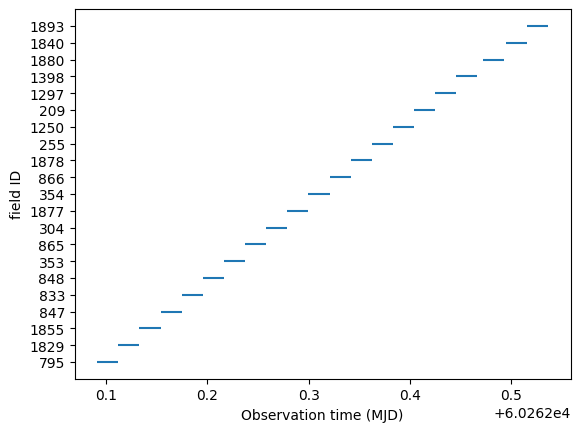

In [21]:
ax = plt.axes()
ax.hlines(
    np.arange(len(scheduled_fields)),
    scheduled_fields['scheduled_start_time'].mjd,
    scheduled_fields['scheduled_end_time'].mjd)
ax.set_yticks(np.arange(len(scheduled_fields)), scheduled_fields['field_id'].astype(str))
ax.set_xlabel('Observation time (MJD)')
ax.set_ylabel('field ID')